In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from statsmodels.tsa.stattools import coint
import seaborn as sns
import matplotlib.pyplot as plt

# Lithium

In [2]:
# Load data source #1 - Lithium prices in USD per kilogram
df1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Lithium_prices_2017-01-01_to_2021-12-31_merged.csv')
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Price'] = df1['Price'].astype(float)
df1 = df1.drop(columns=['Unit'])
df1.head()

,Date,Price
0,2017-05-10,20.92
1,2017-05-11,20.92
2,2017-05-12,20.92
3,2017-05-15,20.92
4,2017-05-16,20.92


In [3]:
# Load data source #2 - South America LOB
df2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/lithium_SouthAmerica_LOB_2017m.csv', sep=';')
df2.head()
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Price'] = df2['Price'].astype(float)
df2['Price'] = df2['Price']
df2.head()

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_3899/3600085802.py:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df2['Date'] = pd.to_datetime(df2['Date'])


,Date,Price
0,2016-12-31,10000.0
1,2017-01-31,10000.0
2,2017-02-28,10250.0
3,2017-03-31,10250.0
4,2017-04-30,10500.0


In [4]:
# Load data source #3 - COMEX Lithium Hydroxide future
df3 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/COMEX Lithium Hydroxide CIF CJK (Fastmarkets) Electronic Commodity Future Continuation 1.csv', sep=';')
df3 = df3.rename(columns={'Exchange Date': 'Date'})
df3 = df3.rename(columns={'Close' : 'Price'})
df3['Date'] = pd.to_datetime(df3['Date'], format='%d-%b-%Y')
df3 = df3.iloc[:, :2] # Keep only the first 4 columns
df3.head()

,Date,Price
0,2021-05-03,14
1,2021-05-04,14
2,2021-05-05,14
3,2021-05-06,14
4,2021-05-07,14


In [5]:
# Load Lithium data source #4 - Lithium Americas Corp
df4 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Lithium Americas Corp.csv', sep=';')
df4 = df4.rename(columns={'Exchange Date': 'Date'})
df4 = df4.rename(columns={'Close' : 'Price'})
df4['Date'] = pd.to_datetime(df4['Date'], format='%d-%b-%Y')
df4 = df4.iloc[:, :2] # Keep only the first 2 columns
df4['Price'] = df4['Price'].str.replace(',', '.').astype(float)
df4 = df4.sort_values(by='Date')
df4.head()

,Date,Price
404,2023-10-02,10.13
403,2023-10-03,9.67
402,2023-10-04,11.72
401,2023-10-05,10.90
400,2023-10-06,11.49


In [6]:
# Load Lithium data source #5 - East Asia Lithium Carbonate 99.5% Swap
df5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/East Asia Lithium Carbonate 99.5% CIF CJK Financial Swap USD_MT (Fastmarkets) Singapore Exchange SIMEX.csv', sep=';')
df5 = df5.iloc[:, :2]
df5['Date'] = pd.to_datetime(df5['Date'], format='%m/%d/%y')
df5['Close Price'] = df5['Close Price'].str.replace(',', '.').astype(float)
df5 = df5.rename(columns={'Close Price': 'Price'})
df5 = df5.sort_values(by='Date')
df5.head()

,Date,Price
493,2023-05-02,37.75
492,2023-05-03,36.44
491,2023-05-04,36.48
490,2023-05-05,36.48
489,2023-05-08,36.48


In [7]:
# Load Lithium data source #6 - East Asia Lithium Carbonate Battery Grade CIF
df6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/East Asia Lithium Carbonate China Korea Japan Battery Grade CIF USD_kg Future Singapore Exchange SIMEX.csv', sep=';')
df6 = df6.iloc[:, :2]
df6['Date'] = pd.to_datetime(df6['Date'], format='%m/%d/%y')
df6['Close Price'] = df6['Close Price'].str.replace(',', '.').astype(float)
df6 = df6.rename(columns={'Close Price': 'Price'})
df6 = df6.sort_values(by='Date')
df6.head()

,Date,Price
512,2023-04-03,43.70
511,2023-04-04,42.94
510,2023-04-05,42.92
509,2023-04-06,40.36
508,2023-04-10,38.67


In [8]:
# Load Lithium data source #7 - LME Lithium 3MO
df7 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/LME Lithium Hydroxide CIF (Fastmakrets MB) Future.csv', sep=';')
df7.head()
df7['Date'] = pd.to_datetime(df7['Date'], format='mixed')
df7 = df7.rename(columns={'Close Price': 'Price'})
df7['Price'] = df7['Price'].str.replace(',', '.').astype(float)
df7 = df7.sort_values(by='Date')
df7 = df7.iloc[:, :2]
df7.head()

,Date,Price
934,2021-07-19,15450.0
933,2021-07-20,15450.0
932,2021-07-21,15450.0
931,2021-07-22,15450.0
930,2021-07-23,15450.0


In [9]:
# Merge all
df_merged = pd.merge(df1, df2, on='Date', suffixes=('_Lithium', '_SouthAmericaLOB'))
df_merged = pd.merge(df_merged, df3[['Date', 'Price']], on='Date', how='inner')
df_merged = pd.merge(df_merged, df4[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Hydroxide', '_Lithium_Americas'))
df_merged = pd.merge(df_merged, df5[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Americas', '_EastAsia_Lithium_Carbonate'))
df_merged = pd.merge(df_merged, df6[['Date', 'Price']], on='Date', how='inner', suffixes=('_EastAsia_Lithium_Carbonate', '_EastAsia_Lithium_Carbonate_Battery_Grade'))
# Rename 'Price' in df7 to 'Price_LME_Lithium' before merging
df7_renamed = df7.rename(columns={'Price': 'Price_LME_Lithium'})
df_merged = pd.merge(df_merged, df7_renamed[['Date', 'Price_LME_Lithium']], on='Date', how='inner')

df_merged = df_merged.rename(columns={'Price_Lithium': 'Price_Lithium',
                                      'Price_SouthAmericaLOB': 'Price_SouthAmericaLOB',
                                      'Price_Lithium_Hydroxide': 'Price_Lithium_Hydroxide',
                                      'Price_Lithium_Americas': 'Price_Lithium_Americas',
                                      'Price_EastAsia_Lithium_Carbonate': 'Price_EastAsia_Lithium_Carbonate',
                                      'Price_EastAsia_Lithium_Carbonate_Battery_Grade': 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'})

# Convert all price columns to float
df_merged['Price_Lithium'] = df_merged['Price_Lithium'].astype(float)
df_merged['Price_SouthAmericaLOB'] = df_merged['Price_SouthAmericaLOB'].astype(float)
df_merged['Price_Lithium_Hydroxide'] = df_merged['Price_Lithium_Hydroxide'].astype(float)
df_merged['Price_Lithium_Americas'] = df_merged['Price_Lithium_Americas'].astype(float)
df_merged['Price_EastAsia_Lithium_Carbonate'] = df_merged['Price_EastAsia_Lithium_Carbonate'].astype(float)
df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'] = df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'].astype(float)
df_merged['Price_LME_Lithium'] = df_merged['Price_LME_Lithium'].astype(float)

df_merged = df_merged.sort_values(by='Date').reset_index(drop=True)
df_merged.head()

,Date,Price_Lithium,Price_SouthAmericaLOB,Price_Lithium_Hydroxide,Price_Lithium_Americas,Price_EastAsia_Lithium_Carbonate,Price_EastAsia_Lithium_Carbonate_Battery_Grade,Price_LME_Lithium
0,2023-10-04,22.814,32750.0,25.0,11.72,22.77,22.66,24500.00
1,2023-10-18,23.857,28250.0,24.0,8.16,23.32,23.25,23886.36
2,2023-11-01,22.339,28250.0,22.0,6.60,18.23,18.15,22000.00
3,2023-11-15,20.507,28250.0,21.0,7.54,19.87,18.88,21488.64
4,2023-11-29,17.748,23750.0,21.0,6.60,17.85,16.94,20693.18


In [10]:
print(f"First observation date: {df_merged['Date'].min()}, Last observation date: {df_merged['Date'].max()}")

First observation date: 2023-10-04 00:00:00, Last observation date: 2024-12-11 00:00:00


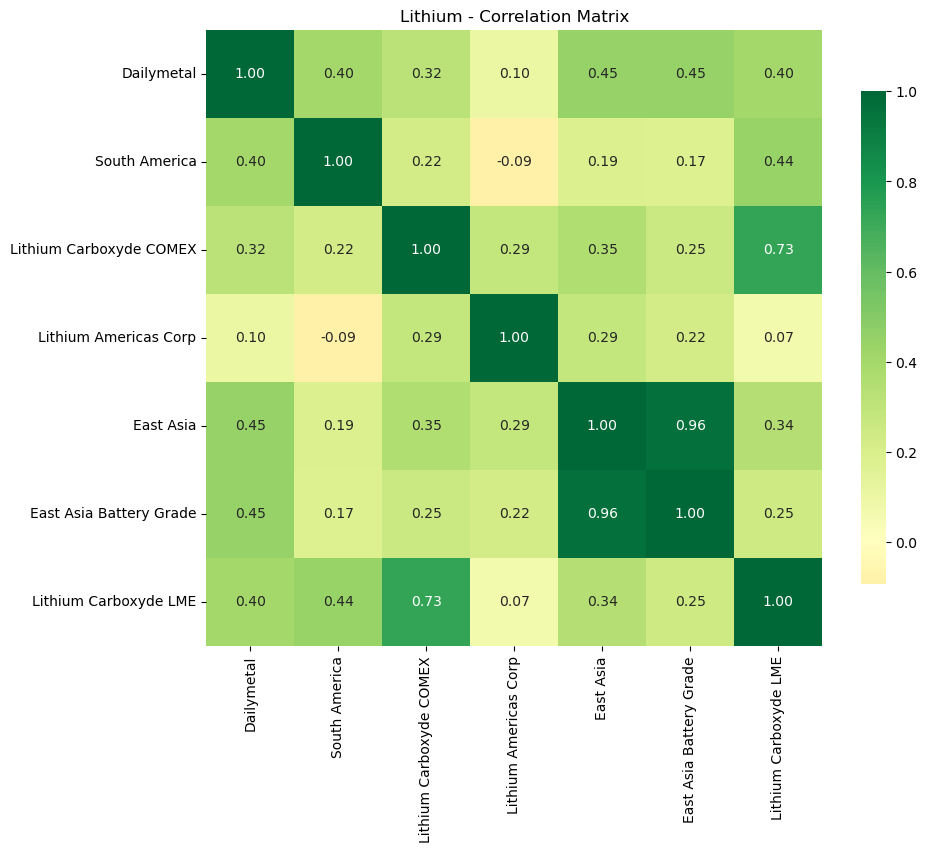

In [11]:
# Calculate the correlation matrix using the returns
df_merged['Dailymetal'] = df_merged['Price_Lithium'].pct_change()
df_merged['South America'] = df_merged['Price_SouthAmericaLOB'].pct_change()
df_merged['Lithium Carboxyde COMEX'] = df_merged['Price_Lithium_Hydroxide'].pct_change()
df_merged['Lithium Americas Corp'] = df_merged['Price_Lithium_Americas'].pct_change()
df_merged['East Asia'] = df_merged['Price_EastAsia_Lithium_Carbonate'].pct_change()
df_merged['East Asia Battery Grade'] = df_merged['Price_EastAsia_Lithium_Carbonate_Battery_Grade'].pct_change()
df_merged['Lithium Carboxyde LME'] = df_merged['Price_LME_Lithium'].pct_change()
# Drop NaN values
df_merged = df_merged.dropna(subset=['Dailymetal', 'South America', 'Lithium Carboxyde COMEX', 'Lithium Americas Corp', 'East Asia', 'East Asia Battery Grade', 'Lithium Carboxyde LME'])
df_merged = df_merged.dropna()
# Calculate the correlation matrix using the correct return columns
correlation_matrix = df_merged[['Dailymetal', 'South America', 'Lithium Carboxyde COMEX', 'Lithium Americas Corp', 'East Asia', 'East Asia Battery Grade', 'Lithium Carboxyde LME']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Lithium - Correlation Matrix')
# plt.figtext(0.1, -0.15, "First observation date: 2023-10-04, Last observation date: 2024-12-11", ha='center', fontsize=7)
plt.show()


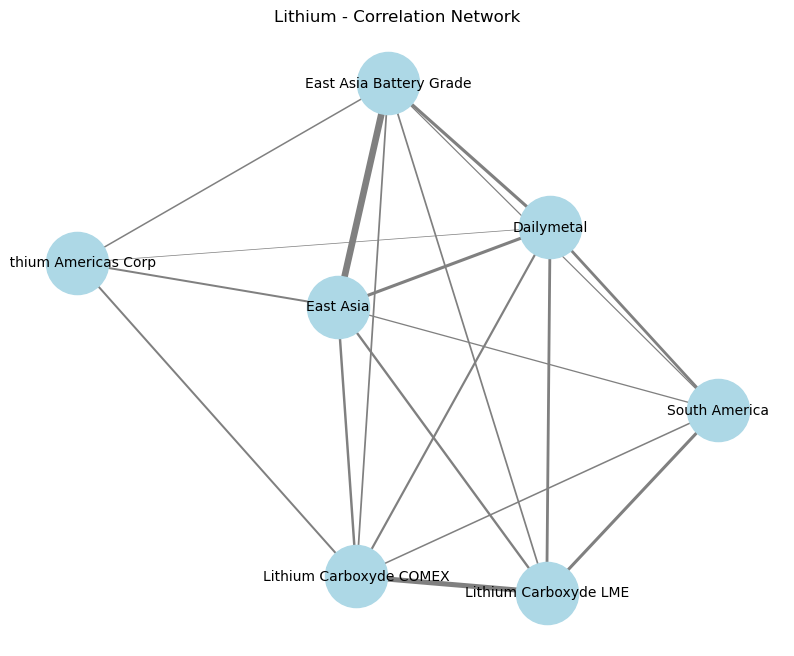

In [12]:
# The same plot but a graph with lines of different widths the higher the correlation
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Create a graph from the correlation matrix
G = nx.Graph()
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.1:  # Only include edges with correlation above a threshold
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j], weight=corr_value)
# Define positions for the nodes
pos = nx.spring_layout(G, seed=42)
# Draw the nodes
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
# Draw the edges with widths based on correlation values
edges = G.edges(data=True)
weights = [abs(data['weight']) * 5 for _, _, data in edges]
nx.draw_networkx_edges(G, pos, width=weights, edge_color='gray')
# Draw the labels
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title('Lithium - Correlation Network')
plt.axis('off')
plt.show()

In [13]:
# Print min and max date for all data sources
print(f"First observation date df1: {df1['Date'].min()}, Last observation date df1: {df1['Date'].max()}")
print(f"First observation date df2: {df2['Date'].min()}, Last observation date df2: {df2['Date'].max()}")
print(f"First observation date df3: {df3['Date'].min()}, Last observation date df3: {df3['Date'].max()}")
print(f"First observation date df4: {df4['Date'].min()}, Last observation date df4: {df4['Date'].max()}")
print(f"First observation date df5: {df5['Date'].min()}, Last observation date df5: {df5['Date'].max()}")
print(f"First observation date df6: {df6['Date'].min()}, Last observation date df6: {df6['Date'].max()}")
print(f"First observation date df7: {df7['Date'].min()}, Last observation date df7: {df7['Date'].max()}")

First observation date df1: 2017-05-10 00:00:00, Last observation date df1: 2024-12-31 00:00:00
First observation date df2: 2016-12-31 00:00:00, Last observation date df2: 2024-12-11 00:00:00
First observation date df3: 2021-05-03 00:00:00, Last observation date df3: 2025-05-13 00:00:00
First observation date df4: 2023-10-02 00:00:00, Last observation date df4: 2025-05-13 00:00:00
First observation date df5: 2023-05-02 00:00:00, Last observation date df5: 2025-03-28 00:00:00
First observation date df6: 2023-04-03 00:00:00, Last observation date df6: 2025-03-28 00:00:00
First observation date df7: 2021-07-19 00:00:00, Last observation date df7: 2025-03-28 00:00:00


In [14]:
dfmerged2 = pd.merge(df1, df2, on='Date', suffixes=('_Lithium', '_SouthAmericaLOB'))
dfmerged2 = pd.merge(dfmerged2, df7[['Date', 'Price']], on='Date', how='inner', suffixes=('_Lithium_Hydroxide', '_LME_Nickel'))
dfmerged2 = pd.merge(dfmerged2, df3[['Date', 'Price']], on='Date', how='inner')

dfmerged2 = dfmerged2.rename(columns={'Price_x': 'Price_LME',
                                      'Price_y': 'Price_COMEX'})

dfmerged2.head()

,Date,Price_Lithium,Price_SouthAmericaLOB,Price_LME,Price_COMEX
0,2021-08-31,14.316,11000.0,16070.0,16
1,2021-09-30,25.526,11500.0,20100.0,20
2,2021-11-30,31.156,14000.0,29380.0,27
3,2021-12-31,42.754,18000.0,31480.0,31
4,2022-01-31,57.771,25000.0,38600.0,39


In [15]:
print(f"First observation date dfmerged2: {dfmerged2['Date'].min()}, Last observation date dfmerged2: {dfmerged2['Date'].max()}")

First observation date dfmerged2: 2021-08-31 00:00:00, Last observation date dfmerged2: 2024-12-11 00:00:00


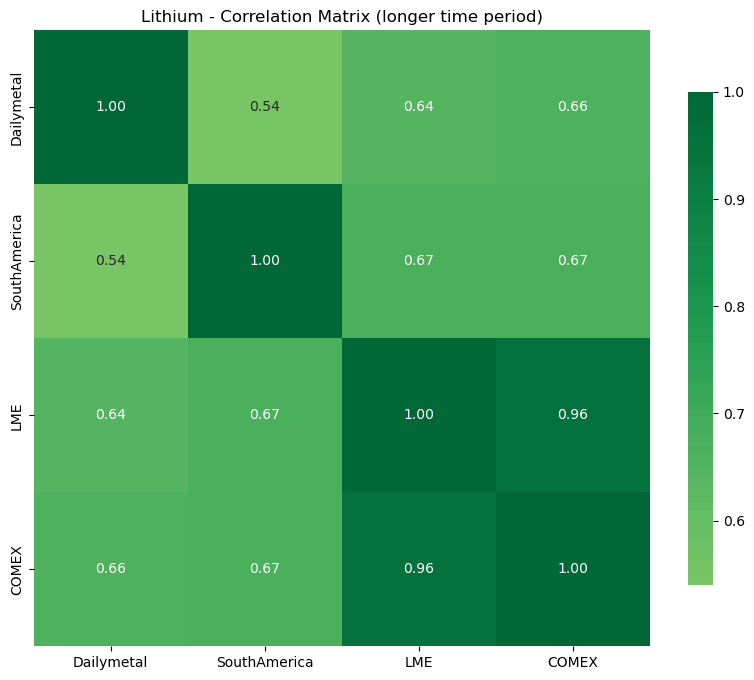

In [16]:
dfmerged2['Dailymetal'] = dfmerged2['Price_Lithium'].pct_change()
dfmerged2['SouthAmerica'] = dfmerged2['Price_SouthAmericaLOB'].pct_change()

dfmerged2['LME'] = dfmerged2['Price_LME'].pct_change()
dfmerged2['COMEX'] = dfmerged2['Price_COMEX'].pct_change()
dfmerged2.dropna(inplace=True)

correlation_matrix2 = dfmerged2[['Dailymetal', 'SouthAmerica', 'LME', 'COMEX']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix2, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Lithium - Correlation Matrix (longer time period)')
plt.show()

In [17]:
from colorama import Fore, Style, init

# Define pairs of time series for cointegration tests, including the new series
pairs = [
    ('Price_Lithium', 'Price_SouthAmericaLOB'),
    ('Price_Lithium', 'Price_Lithium_Hydroxide'),
    ('Price_SouthAmericaLOB', 'Price_Lithium_Hydroxide'),
    ('Price_Lithium', 'Price_Lithium_Americas'),
    ('Price_SouthAmericaLOB', 'Price_Lithium_Americas'),
    ('Price_Lithium_Hydroxide', 'Price_Lithium_Americas'),
    ('Price_Lithium', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_SouthAmericaLOB', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_Lithium_Hydroxide', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate'),
    ('Price_EastAsia_Lithium_Carbonate', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_SouthAmericaLOB', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium_Hydroxide', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade'),
    ('Price_Lithium_Americas', 'Price_EastAsia_Lithium_Carbonate_Battery_Grade')
]

# Perform tests and collect results
results = []
for series1, series2 in pairs:
    score, p_value, _ = coint(df_merged[series1], df_merged[series2])
    results.append((series1, series2, score, p_value))

# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")


Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Lithium                           Price_SouthAmericaLOB                   -0.8483        0.9280         
Price_Lithium                           Price_Lithium_Hydroxide                 -4.0403        0.0063         
Price_SouthAmericaLOB                   Price_Lithium_Hydroxide                 -1.6922        0.6805         
Price_Lithium                           Price_Lithium_Americas                  -2.6556        0.2160         
Price_SouthAmericaLOB                   Price_Lithium_Americas                  -3.5134        0.0312         
Price_Lithium_Hydroxide                 Price_Lithium_Americas                  -3.5851        0.0256         
Price_Lithium                           Price_EastAsia_Lithium_Carbonate        -2.7599        0.1788         
Price_SouthAmericaLOB                   Price_EastAsia_Lithium_Carbonate        -0.9

In [18]:
print("\\begin{table}[ht]")
print("\\centering")
print("\\begin{tabular}{|l|l|r|r|}")
print("\\hline")
print("Series 1 & Series 2 & Score & P-Value \\\\ \\hline")
for series1, series2, score, p_value in results:
    print(f"{series1} & {series2} & {score:.4f} & {p_value:.4f} \\\\")
print("\\hline")
print("\\end{tabular}")
print("\\caption{Cointegration Test Results}")
print("\\label{tab:cointegration}")
print("\\end{table}")


\begin{table}[ht]
\centering
\begin{tabular}{|l|l|r|r|}
\hline
Series 1 & Series 2 & Score & P-Value \\ \hline
Price_Lithium & Price_SouthAmericaLOB & -0.8483 & 0.9280 \\
Price_Lithium & Price_Lithium_Hydroxide & -4.0403 & 0.0063 \\
Price_SouthAmericaLOB & Price_Lithium_Hydroxide & -1.6922 & 0.6805 \\
Price_Lithium & Price_Lithium_Americas & -2.6556 & 0.2160 \\
Price_SouthAmericaLOB & Price_Lithium_Americas & -3.5134 & 0.0312 \\
Price_Lithium_Hydroxide & Price_Lithium_Americas & -3.5851 & 0.0256 \\
Price_Lithium & Price_EastAsia_Lithium_Carbonate & -2.7599 & 0.1788 \\
Price_SouthAmericaLOB & Price_EastAsia_Lithium_Carbonate & -0.9883 & 0.9050 \\
Price_Lithium_Hydroxide & Price_EastAsia_Lithium_Carbonate & -3.5006 & 0.0323 \\
Price_Lithium_Americas & Price_EastAsia_Lithium_Carbonate & -2.3872 & 0.3310 \\
Price_EastAsia_Lithium_Carbonate & Price_EastAsia_Lithium_Carbonate_Battery_Grade & -3.1819 & 0.0730 \\
Price_Lithium & Price_EastAsia_Lithium_Carbonate_Battery_Grade & -4.7287 & 0.0005

In [19]:
# Export the merged dataframe to a CSV file
# It should contain the Date and all three price columns
df_merged.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices.csv', index=False)

# Nickel

In [20]:
# Load Nickel data source #1 - Nickel prices per pound from Dailymetalprice
dfn1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Nickel_prices_2017-01-01_to_2024-12-31_merged.csv')
dfn1['Date'] = pd.to_datetime(dfn1['Date'])
dfn1['Price'] = dfn1['Price'].astype(float)
dfn1 = dfn1.drop(columns=['Unit'])
dfn1 = dfn1.drop_duplicates(subset=['Date'])
dfn1.head()

,Date,Price
0,2017-01-02,4.5196
2,2017-01-03,4.6266
4,2017-01-04,4.5223
6,2017-01-05,4.6380
8,2017-01-06,4.6176


In [21]:
# Load Nickel data source #2 - Nickel HLOC from LME
dfn2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/nickel_HLOC_2017_2024.csv', sep=';')
dfn2['Date'] = pd.to_datetime(dfn2['Date'], dayfirst=True)
dfn2 = dfn2.rename(columns={'PX_LAST': 'Price'})
dfn2['Price'] = dfn2['Price'].astype(float)
dfn2 = dfn2.drop(index=0)
dfn2 = dfn2.sort_values(by='Date')
dfn2 = dfn2.iloc[:, :2] 
dfn2['Price'] = dfn2['Price']
dfn2.head()

,Date,Price
2014,2016-12-30,10020.0
2013,2017-01-03,9910.0
2012,2017-01-04,10220.0
2011,2017-01-05,10295.0
2010,2017-01-06,10245.0


In [22]:
# Load Nickel data source #3 - Nickel Miners ETF
dfn3 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Sprott Nickel Prices ETF.csv', sep=';')
dfn3 = dfn3.rename(columns={'Exchange Date': 'Date'})
dfn3 = dfn3.rename(columns={'Close' : 'Price'})
dfn3['Date'] = pd.to_datetime(dfn3['Date'], format='%d-%b-%Y')
dfn3['Price'] = dfn3['Price'].str.replace(',', '.').astype(float)
dfn3 = dfn3.sort_values(by='Date')
dfn3.head()

,Date,Price,Net,%Chg,Open,Low,High
0,2023-03-22,20.82,NaN,NaN,"21,11","20,82","21,15"
1,2023-03-23,20.75,"-0,07","-0,36%","21,02","20,69","21,14"
2,2023-03-24,20.79,"+0,04","+0,20%","20,64","20,64","20,88"
3,2023-03-27,20.80,"+0,01","+0,04%","20,96","20,78","20,96"
4,2023-03-28,21.51,"+0,71","+3,41%","21,31","21,31","21,51"


In [23]:
# Load Nickel data source #4 - SHFE Nickel Future 1M
dfn4 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/SHFE Nickel Commodity Future Continuation 1.csv', sep=';')
dfn4 = dfn4.iloc[:, :2]  # Keep only the first 2 columns
dfn4['Date'] = pd.to_datetime(dfn4['Date'], format='%d-%b-%Y')
dfn4['Price'] = dfn4['Price'].str.replace(',', '.').astype(float)
dfn4 = dfn4.sort_values(by='Date')
dfn4.head()

,Date,Price
2026,2017-01-03,84.78
2025,2017-01-04,82.91
2024,2017-01-05,83.91
2023,2017-01-06,83.51
2022,2017-01-09,84.42


In [24]:
# Load Nickel data source #5 - WUXI Nickel Future 1M
dfn5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/WUXI Metal Nickel Monthly Continuation 1.csv', sep=';')
dfn5 = dfn5.iloc[:, :2]  # Keep only the first 2 columns
dfn5['Date'] = pd.to_datetime(dfn5['Date'], format='%d-%b-%Y')
dfn5 = dfn5.sort_values(by='Date')
dfn5.head()

,Date,Price
2423,2017-01-03,83.60
2422,2017-01-04,84.00
2421,2017-01-05,84.30
2420,2017-01-06,84.15
2419,2017-01-09,85.25


In [25]:
# Load Nickel data source #6 - India Nickel Future 1M
dfn6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Multi Commodity Exchange Of India Nickel Commodity Future Continuation 1.csv', sep=';')
dfn6 = dfn6.iloc[:, :2]  # Keep only the first 2 columns
dfn6['Date'] = pd.to_datetime(dfn6['Date'], format='%d-%b-%Y')
dfn6 = dfn6.sort_values(by='Date')
dfn6['Price'] = dfn6['Price'].str.replace(',', '').astype(float)
dfn6.head()

,Date,Price
2149,2017-01-02,690.7
2148,2017-01-03,683.8
2147,2017-01-04,697.1
2146,2017-01-05,696.1
2145,2017-01-06,700.5


In [26]:
# Merge all three dataframes on the 'Date' column
dfn_merged = pd.merge(dfn1, dfn2, on='Date', suffixes=('_Nickel', '_LME'))
dfn_merged = pd.merge(dfn_merged, dfn3[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_ETF'})
dfn_merged = pd.merge(dfn_merged, dfn4[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_SHFE'})
dfn_merged = pd.merge(dfn_merged, dfn5[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_WUXI'})
dfn_merged = pd.merge(dfn_merged, dfn6[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_India'})

# Convert all price columns to float
dfn_merged['Price_Nickel'] = dfn_merged['Price_Nickel'].astype(float)
dfn_merged['Price_LME'] = dfn_merged['Price_LME'].astype(float)
dfn_merged['Price_ETF'] = dfn_merged['Price_ETF'].astype(float)
dfn_merged['Price_SHFE'] = dfn_merged['Price_SHFE'].astype(float)
dfn_merged['Price_WUXI'] = dfn_merged['Price_WUXI'].astype(float)
dfn_merged['Price_India'] = dfn_merged['Price_India'].astype(float)

In [27]:
print(f"First observation date: {df_merged['Date'].min()}, Last observation date: {df_merged['Date'].max()}")

First observation date: 2023-10-18 00:00:00, Last observation date: 2024-12-11 00:00:00


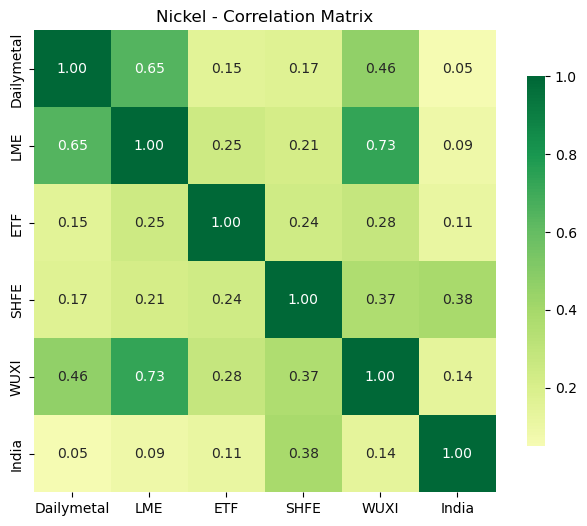

In [28]:
# Calculate the correlation matrix using the returns
dfn_merged['Dailymetal'] = dfn_merged['Price_Nickel'].pct_change()
dfn_merged['LME'] = dfn_merged['Price_LME'].pct_change()
dfn_merged['ETF'] = dfn_merged['Price_ETF'].pct_change()
dfn_merged['SHFE'] = dfn_merged['Price_SHFE'].pct_change()
dfn_merged['WUXI'] = dfn_merged['Price_WUXI'].pct_change()
dfn_merged['India'] = dfn_merged['Price_India'].pct_change()
# Drop NaN values
dfn_merged = dfn_merged.dropna(subset=['Dailymetal', 'LME', 'ETF', 'SHFE', 'WUXI', 'India'])
# Calculate the correlation matrix
correlation_matrix_nickel = dfn_merged[['Dailymetal', 'LME', 'ETF', 'SHFE', 'WUXI', 'India']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_nickel, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Nickel - Correlation Matrix')
plt.show()

In [29]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint

# Define pairs of time series for cointegration tests
pairs_nickel = [
    ('Price_Nickel', 'Price_LME'),
    ('Price_Nickel', 'Price_ETF'),
    ('Price_LME', 'Price_ETF'),
    ('Price_Nickel', 'Price_SHFE'),
    ('Price_LME', 'Price_SHFE'),
    ('Price_ETF', 'Price_SHFE'),
    ('Price_Nickel', 'Price_WUXI'),
    ('Price_LME', 'Price_WUXI'),
    ('Price_ETF', 'Price_WUXI'),
    ('Price_SHFE', 'Price_WUXI'),
    ('Price_Nickel', 'Price_India'),
    ('Price_LME', 'Price_India'),
    ('Price_ETF', 'Price_India'),
    ('Price_SHFE', 'Price_India'),
    ('Price_WUXI', 'Price_India')
]
# Perform tests and collect results
results_nickel = []
for series1, series2 in pairs_nickel:
    score, p_value, _ = coint(dfn_merged[series1], dfn_merged[series2])
    results_nickel.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Nickel Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_nickel:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")


Nickel Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Nickel                            Price_LME                               -5.3987        0.0000         
Price_Nickel                            Price_ETF                               -3.2338        0.0645         
Price_LME                               Price_ETF                               -3.0985        0.0886         
Price_Nickel                            Price_SHFE                              -2.9393        0.1253         
Price_LME                               Price_SHFE                              -2.8389        0.1536         
Price_ETF                               Price_SHFE                              -2.4327        0.3096         
Price_Nickel                            Price_WUXI                              -2.3036        0.3718         
Price_LME                               Price_WUXI                           

In [30]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")
for series1, series2, score, p_value in results_nickel:
    series1 = series1.replace("_", "\\_")
    series2 = series2.replace("_", "\\_")
    print(f"{series1} & {series2} & {score:.4f} & {p_value:.4f} \\\\")
print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results}")
print("\\label{tab:cointegration}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
Price\_Nickel & Price\_LME & -5.3987 & 0.0000 \\
Price\_Nickel & Price\_ETF & -3.2338 & 0.0645 \\
Price\_LME & Price\_ETF & -3.0985 & 0.0886 \\
Price\_Nickel & Price\_SHFE & -2.9393 & 0.1253 \\
Price\_LME & Price\_SHFE & -2.8389 & 0.1536 \\
Price\_ETF & Price\_SHFE & -2.4327 & 0.3096 \\
Price\_Nickel & Price\_WUXI & -2.3036 & 0.3718 \\
Price\_LME & Price\_WUXI & -2.5628 & 0.2521 \\
Price\_ETF & Price\_WUXI & -2.6758 & 0.2084 \\
Price\_SHFE & Price\_WUXI & -8.5763 & 0.0000 \\
Price\_Nickel & Price\_India & -7.8728 & 0.0000 \\
Price\_LME & Price\_India & -7.4537 & 0.0000 \\
Price\_ETF & Price\_India & -2.2388 & 0.4044 \\
Price\_SHFE & Price\_India & -2.4862 & 0.2852 \\
Price\_WUXI & Price\_India & -2.9929 & 0.1119 \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results}
\label{tab:cointegration}
\end{table}


### Without the ETF

In [31]:
# Merge all three dataframes on the 'Date' column
dfn_merged = pd.merge(dfn1, dfn2, on='Date', suffixes=('_Nickel', '_LME'))
dfn_merged = pd.merge(dfn_merged, dfn4[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_SHFE'})
dfn_merged = pd.merge(dfn_merged, dfn5[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_WUXI'})
dfn_merged = pd.merge(dfn_merged, dfn6[['Date', 'Price']], on='Date', how='inner')
dfn_merged = dfn_merged.rename(columns={'Price': 'Price_India'})

# Convert all price columns to float
dfn_merged['Price_Nickel'] = dfn_merged['Price_Nickel'].astype(float)
dfn_merged['Price_LME'] = dfn_merged['Price_LME'].astype(float)
dfn_merged['Price_SHFE'] = dfn_merged['Price_SHFE'].astype(float)
dfn_merged['Price_WUXI'] = dfn_merged['Price_WUXI'].astype(float)
dfn_merged['Price_India'] = dfn_merged['Price_India'].astype(float)

print(f"First observation date: {dfn_merged['Date'].min()}, Last observation date: {dfn_merged['Date'].max()}")

First observation date: 2017-01-03 00:00:00, Last observation date: 2024-12-27 00:00:00


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_3899/1612453971.py:6: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  dfn_merged['India'] = dfn_merged['Price_India'].pct_change()


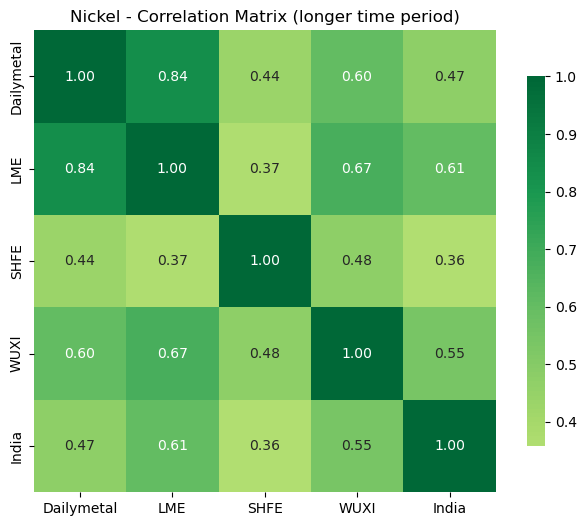

In [32]:
# Calculate the correlation matrix using the returns
dfn_merged['Dailymetal'] = dfn_merged['Price_Nickel'].pct_change()
dfn_merged['LME'] = dfn_merged['Price_LME'].pct_change()
dfn_merged['SHFE'] = dfn_merged['Price_SHFE'].pct_change()
dfn_merged['WUXI'] = dfn_merged['Price_WUXI'].pct_change()
dfn_merged['India'] = dfn_merged['Price_India'].pct_change()
# Drop NaN values
dfn_merged = dfn_merged.dropna(subset=['Dailymetal', 'LME', 'SHFE', 'WUXI', 'India'])
# Calculate the correlation matrix
correlation_matrix_nickel = dfn_merged[['Dailymetal', 'LME', 'SHFE', 'WUXI', 'India']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_nickel, annot=True, center=0, cmap='RdYlGn', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Nickel - Correlation Matrix (longer time period)')
plt.show()

# Cobalt

In [33]:
# Load Cobalt data source #1 - Cobalt prices per pound from Dailymetalprice
dfc1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Cobalt_prices_2017-01-01_to_2024-12-31_merged.csv')
dfc1['Date'] = pd.to_datetime(dfc1['Date'])
dfc1['Price'] = dfc1['Price'].astype(float)
dfc1 = dfc1.drop(columns=['Unit'])
dfc1 = dfc1.drop_duplicates(subset=['Date'])
dfc1 = dfc1.sort_values(by='Date')
dfc1.head()

,Date,Price
0,2017-01-02,14.855
2,2017-01-03,14.742
4,2017-01-04,14.742
6,2017-01-05,14.742
8,2017-01-06,14.742


In [34]:
# Load Cobalt data source #2 - Cobalt HLOC from LME
dfc2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/bloomberg_data/cobalt_HLOC_2017_2024.csv', sep=';')
dfc2['Date'] = pd.to_datetime(dfc2['Date'], dayfirst=True)
dfc2 = dfc2.rename(columns={'PX_LAST': 'Price'})
# Replace commas with dots and convert the 'Price' column to float
dfc2['Price'] = dfc2['Price'].str.replace(',', '.').astype(float)
dfc2 = dfc2.drop(index=0)
dfc2 = dfc2.sort_values(by='Date')
dfc2 = dfc2.iloc[:, :2]
dfc2['Price'] = dfc2['Price']
dfc2.head()

,Date,Price
2019,2016-12-30,32734.0
2018,2017-01-03,32735.0
2017,2017-01-04,32736.0
2016,2017-01-05,32739.5
2015,2017-01-06,32740.5


In [35]:
# Load Cobalt data source #3 - LME 3 Month Cobalt Composite Forward
# dfc3 = pd.read_csv('reuters_data/LME 3 Month Cobalt Composite Commodity Forward .csv', sep=';')
# dfc3 = dfc3.iloc[:, :2]
# dfc3 = dfc3.rename(columns={'Close' : 'Price'})
# dfc3['Date'] = pd.to_datetime(dfc3['Date'], format='%d-%b-%Y')
# # Clean the 'Price' column by removing non-breaking spaces and replacing commas with dots
# dfc3['Price'] = dfc3['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
# dfc3['Price'] = dfc3['Price']
# dfc3.head()

In [36]:
# Load Cobalt data source #4 - LME Cobalt SPOT
# dfc4 = pd.read_csv('/Users/michal/Documents/Code/metals/bloomberg_data/LME Cobalt SPOT.csv', sep=';')
# dfc4 = dfc4.iloc[:, :2]
# dfc4 = dfc4.rename(columns={'Close Price' : 'Price'})
# dfc4['Date'] = pd.to_datetime(dfc4['Date'], format='%m/%d/%y')
# dfc4 = dfc4.sort_values(by='Date')
# dfc4['Price'] = dfc4['Price'].str.replace(',', '.').astype(float)
# dfc4['Price'] = dfc4['Price']
# dfc4.head()

In [37]:
# Load Cobalt data source #5 - LME All Location Cobalt Total Stock Commodity Statistics Contract 
dfc5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/LME All Location Cobalt Total Stock Commodity Statistics Contract .csv', sep=';')
dfc5 = dfc5.iloc[:, :2]
dfc5 = dfc5.rename(columns={'Close' : 'Price'})
dfc5 = dfc5.rename(columns={'Exchange Date': 'Date'})
dfc5['Date'] = pd.to_datetime(dfc5['Date'], format='%d-%b-%Y')
dfc5['Price'] = dfc5['Price'].astype(str).str.replace(',', '.').astype(float)
dfc5 = dfc5.sort_values(by='Date')
dfc5.head()

,Date,Price
2111,2017-01-03,691.0
2110,2017-01-04,676.0
2109,2017-01-05,676.0
2108,2017-01-06,676.0
2107,2017-01-09,676.0


In [38]:
# Load Cobalt data source #6 - WUXI Cobalt Bi-Monthly Future
dfc6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/WUXI Metal Nickel Monthly Continuation 1.csv', sep=';')
dfc6 = dfc6.iloc[:, :2]
dfc6['Date'] = pd.to_datetime(dfc6['Date'], format='%d-%b-%Y')
dfc6['Price'] = dfc6['Price'].astype(float)
dfc6 = dfc6.sort_values(by='Date')
dfc6.head()

,Date,Price
2423,2017-01-03,83.60
2422,2017-01-04,84.00
2421,2017-01-05,84.30
2420,2017-01-06,84.15
2419,2017-01-09,85.25


In [39]:
# Load Cobalt data source #7 - COMEX
dfc7 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/COMEX (CMX) Cobalt Metal (Fastmarkets) Electronic Commodity Future Continuation 1.csv', sep=';')
dfc7 = dfc7.iloc[:, :2]
dfc7['Date'] = pd.to_datetime(dfc7['Date'], format='%d-%b-%Y')
dfc7 = dfc7.sort_values(by='Date')
dfc7 = dfc7.dropna(subset=['Price'])
dfc7.head()

,Date,Price
1099,2020-12-28,16.0
1098,2020-12-29,16.0
1097,2020-12-30,16.0
1096,2020-12-31,16.0
1095,2021-01-04,16.0


In [40]:
dfc_merged = pd.merge(dfc1, dfc2, on='Date', suffixes=('_Cobalt', '_LME'))
# dfc_merged = pd.merge(dfc_merged, dfc3[['Date', 'Price']], on='Date', how='inner')
# dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_3M'})
# dfc_merged = pd.merge(dfc_merged, dfc4[['Date', 'Price']], on='Date', how='inner')
# dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_SPOT'})
dfc_merged = pd.merge(dfc_merged, dfc5[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_All_Location_Stock'})
dfc_merged = pd.merge(dfc_merged, dfc6[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_WUXI'})
dfc_merged = pd.merge(dfc_merged, dfc7[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_COMEX'})
# Convert all price columns to float
dfc_merged['Price_Cobalt'] = dfc_merged['Price_Cobalt'].astype(float)
dfc_merged['Price_LME'] = dfc_merged['Price_LME'].astype(float)
# dfc_merged['Price_LME_3M'] = dfc_merged['Price_LME_3M'].astype(float)
# dfc_merged['Price_LME_SPOT'] = dfc_merged['Price_LME_SPOT'].astype(float)
dfc_merged['Price_LME_All_Location_Stock'] = dfc_merged['Price_LME_All_Location_Stock'].astype(float)
dfc_merged['Price_WUXI'] = dfc_merged['Price_WUXI'].astype(float)
dfc_merged['Price_COMEX'] = dfc_merged['Price_COMEX'].astype(float)

In [41]:
print(f"First observation date: {dfc_merged['Date'].min()}, Last observation date: {dfc_merged['Date'].max()}")

First observation date: 2020-12-29 00:00:00, Last observation date: 2024-12-24 00:00:00


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_3899/628054864.py:7: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()


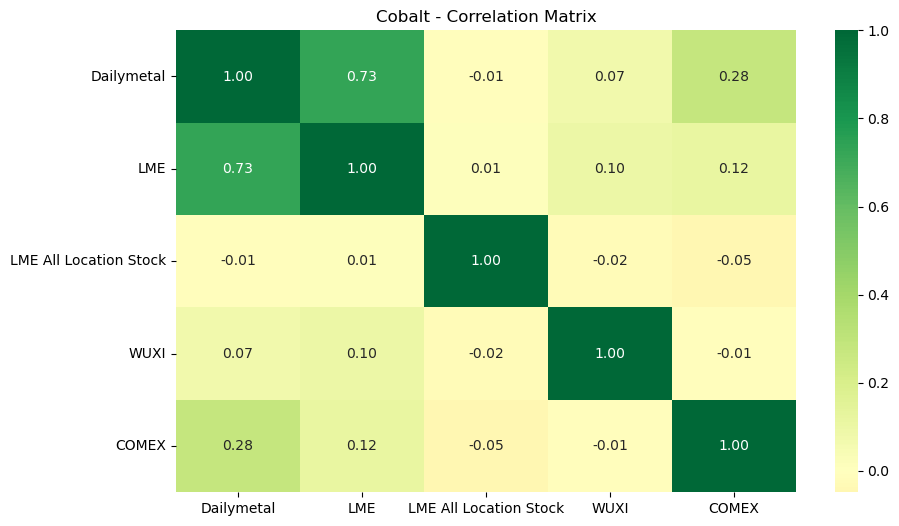

In [42]:
# Calculate the correlation matrix using the returns
dfc_merged['Dailymetal'] = dfc_merged['Price_Cobalt'].pct_change()
dfc_merged['LME'] = dfc_merged['Price_LME'].pct_change()
# dfc_merged['Returns_LME3M'] = dfc_merged['Price_LME_3M'].pct_change()
# dfc_merged['Returns_LMESpot'] = dfc_merged['Price_LME_SPOT'].pct_change()
dfc_merged['LME All Location Stock'] = dfc_merged['Price_LME_All_Location_Stock'].pct_change()
dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()
dfc_merged['COMEX'] = dfc_merged['Price_COMEX'].pct_change()
# Drop NaN values
dfc_merged = dfc_merged.dropna(subset=['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI', 'COMEX'])
# dfc_merged = dfc_merged.dropna(subset=['Returns_Cobalt', 'Returns_LME', 'Returns_LME3M', 'Returns_LMESpot', 'Returns_LME_All_Location_Stock', 'Returns_WUXI', 'Returns_COMEX'])
dfc_merged = dfc_merged.dropna(subset=['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI', 'COMEX'])
# Calculate the correlation matrix
# correlation_matrix_cobalt = dfc_merged[['Returns_Cobalt', 'Returns_LME', 'Returns_LME3M', 'Returns_LMESpot', 'Returns_LME_All_Location_Stock', 'Returns_WUXI', 'Returns_COMEX']].corr()
correlation_matrix_cobalt = dfc_merged[['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI', 'COMEX']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_cobalt, annot=True, center=0, cmap='RdYlGn', fmt='.2f')
plt.title('Cobalt - Correlation Matrix')
plt.show()

In [43]:
dfc_merged.head()

,Date,Price_Cobalt,Price_LME,Price_LME_All_Location_Stock,Price_WUXI,Price_COMEX,Dailymetal,LME,LME All Location Stock,WUXI,COMEX
1,2020-12-30,15.446,31998.0,451.0,124.20,16.0,0.057873,0.000203,0.00000,-0.012326,0.0
2,2020-12-31,15.450,31998.0,451.0,122.35,16.0,0.000259,0.000000,0.00000,-0.014895,0.0
3,2021-01-04,15.350,33000.0,451.0,128.20,16.0,-0.006472,0.031314,0.00000,0.047814,0.0
4,2021-01-05,15.350,34000.0,451.0,129.20,16.0,0.000000,0.030303,0.00000,0.007800,0.0
5,2021-01-06,15.950,35500.0,440.0,129.55,16.0,0.039088,0.044118,-0.02439,0.002709,0.0


In [44]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
# dfc_merged = dfc_merged.rename(columns={'Price_Cobalt': 'Dailymetalprice'})
pairs_cobalt = [
    ('Price_Cobalt', 'Price_LME'),
    ('Price_Cobalt', 'Price_LME_All_Location_Stock'),
    ('Price_LME', 'Price_LME_All_Location_Stock'),
    ('Price_Cobalt', 'Price_WUXI'),
    ('Price_LME', 'Price_WUXI'),
    ('Price_LME_All_Location_Stock', 'Price_WUXI'),
    ('Price_Cobalt', 'Price_COMEX'),
    ('Price_LME', 'Price_COMEX'),
    ('Price_LME_All_Location_Stock', 'Price_COMEX'),
    ('Price_WUXI', 'Price_COMEX')
]
dfc_merged = dfc_merged.dropna(subset=['Price_Cobalt', 'Price_LME', 'Price_LME_All_Location_Stock', 'Price_WUXI', 'Price_COMEX'])
# Perform tests and collect results
results_cobalt = []
for series1, series2 in pairs_cobalt:
    score, p_value, _ = coint(dfc_merged[series1], dfc_merged[series2])
    results_cobalt.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cobalt Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_cobalt:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Cobalt Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Cobalt                            Price_LME                               -6.3241        0.0000         
Price_Cobalt                            Price_LME_All_Location_Stock            -2.6195        0.2290         
Price_LME                               Price_LME_All_Location_Stock            -2.5439        0.2601         
Price_Cobalt                            Price_WUXI                              -1.1814        0.8627         
Price_LME                               Price_WUXI                              -1.1361        0.8739         
Price_LME_All_Location_Stock            Price_WUXI                              -3.5799        0.0259         
Price_Cobalt                            Price_COMEX                             -4.5604        0.0010         
Price_LME                               Price_COMEX                          

In [45]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")
for series1, series2, score, p_value in results_cobalt:
    series1 = series1.replace("_", "\\_")
    series2 = series2.replace("_", "\\_")
    print(f"{series1} & {series2} & {score:.4f} & {p_value:.4f} \\\\")
print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results}")
print("\\label{tab:cointegration}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
Price\_Cobalt & Price\_LME & -6.3241 & 0.0000 \\
Price\_Cobalt & Price\_LME\_All\_Location\_Stock & -2.6195 & 0.2290 \\
Price\_LME & Price\_LME\_All\_Location\_Stock & -2.5439 & 0.2601 \\
Price\_Cobalt & Price\_WUXI & -1.1814 & 0.8627 \\
Price\_LME & Price\_WUXI & -1.1361 & 0.8739 \\
Price\_LME\_All\_Location\_Stock & Price\_WUXI & -3.5799 & 0.0259 \\
Price\_Cobalt & Price\_COMEX & -4.5604 & 0.0010 \\
Price\_LME & Price\_COMEX & -4.7057 & 0.0006 \\
Price\_LME\_All\_Location\_Stock & Price\_COMEX & -4.6306 & 0.0007 \\
Price\_WUXI & Price\_COMEX & -1.9429 & 0.5581 \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results}
\label{tab:cointegration}
\end{table}


### Cobalt w/o COMEX

In [46]:
dfc_merged = pd.merge(dfc1, dfc2, on='Date', suffixes=('_Cobalt', '_LME'))
dfc_merged = pd.merge(dfc_merged, dfc5[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_LME_All_Location_Stock'})
dfc_merged = pd.merge(dfc_merged, dfc6[['Date', 'Price']], on='Date', how='inner')
dfc_merged = dfc_merged.rename(columns={'Price': 'Price_WUXI'})

# Convert all price columns to float
dfc_merged['Price_Cobalt'] = dfc_merged['Price_Cobalt'].astype(float)
dfc_merged['Price_LME'] = dfc_merged['Price_LME'].astype(float)
dfc_merged['Price_LME_All_Location_Stock'] = dfc_merged['Price_LME_All_Location_Stock'].astype(float)
dfc_merged['Price_WUXI'] = dfc_merged['Price_WUXI'].astype(float)

dfc_merged['Dailymetal'] = dfc_merged['Price_Cobalt'].pct_change()
dfc_merged['LME'] = dfc_merged['Price_LME'].pct_change()
dfc_merged['LME All Location Stock'] = dfc_merged['Price_LME_All_Location_Stock'].pct_change()
dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()
# Drop NaN values
dfc_merged = dfc_merged.dropna(subset=['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI'])

print(f"First observation date: {dfc_merged['Date'].min()}, Last observation date: {dfc_merged['Date'].max()}")

First observation date: 2017-01-04 00:00:00, Last observation date: 2024-12-24 00:00:00


/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_3899/2432380993.py:16: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  dfc_merged['WUXI'] = dfc_merged['Price_WUXI'].pct_change()


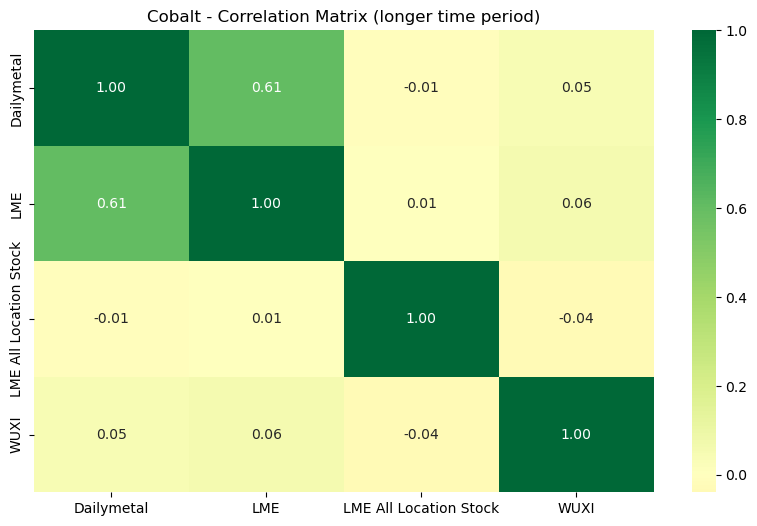

In [47]:
# Calculate the correlation matrix
correlation_matrix_cobalt = dfc_merged[['Dailymetal', 'LME', 'LME All Location Stock', 'WUXI']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_cobalt, annot=True, center=0, cmap='RdYlGn', fmt='.2f')
plt.title('Cobalt - Correlation Matrix (longer time period)')
plt.show()

In [48]:
dfc_merged.head()

,Date,Price_Cobalt,Price_LME,Price_LME_All_Location_Stock,Price_WUXI,Dailymetal,LME,LME All Location Stock,WUXI
1,2017-01-04,14.742,32736.0,676.0,84.00,0.000000,0.000031,-0.021708,0.004785
2,2017-01-05,14.742,32739.5,676.0,84.30,0.000000,0.000107,0.000000,0.003571
3,2017-01-06,14.742,32740.5,676.0,84.15,0.000000,0.000031,0.000000,-0.001779
4,2017-01-09,14.742,32742.0,676.0,85.25,0.000000,0.000046,0.000000,0.013072
5,2017-01-10,14.855,32993.0,676.0,86.45,0.007665,0.007666,0.000000,0.014076


In [49]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
pairs_cobalt = [
    ('Price_Cobalt', 'Price_LME'),
    # ('Price_Cobalt', 'Price_LME_3M'),
    # ('Price_Cobalt', 'Price_LME_SPOT'),
    # ('Price_LME', 'Price_LME_3M'),
    # ('Price_LME', 'Price_LME_SPOT'),
    # ('Price_LME_3M', 'Price_LME_SPOT'),
    ('Price_Cobalt', 'Price_LME_All_Location_Stock'),
    ('Price_LME', 'Price_LME_All_Location_Stock'),
    # ('Price_LME_3M', 'Price_LME_All_Location_Stock'),
    # ('Price_LME_SPOT', 'Price_LME_All_Location_Stock'),
    ('Price_Cobalt', 'Price_WUXI'),
    ('Price_LME', 'Price_WUXI'),
    # ('Price_LME_3M', 'Price_WUXI'),
    # ('Price_LME_SPOT', 'Price_WUXI'),
    ('Price_LME_All_Location_Stock', 'Price_WUXI')
]
# Perform tests and collect results
results_cobalt = []
for series1, series2 in pairs_cobalt:
    # Drop rows with NaN or infinite values in the selected columns
    clean_data = dfc_merged[[series1, series2]].replace([np.inf, -np.inf], np.nan).dropna()
    score, p_value, _ = coint(clean_data[series1], clean_data[series2])
    results_cobalt.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Cobalt Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_cobalt:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Cobalt Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Cobalt                            Price_LME                               -5.0328        0.0001         
Price_Cobalt                            Price_LME_All_Location_Stock            -1.5628        0.7363         
Price_LME                               Price_LME_All_Location_Stock            -1.6423        0.7027         
Price_Cobalt                            Price_WUXI                              -1.3653        0.8092         
Price_LME                               Price_WUXI                              -1.4329        0.7860         
Price_LME_All_Location_Stock            Price_WUXI                              -1.7092        0.6727         


# Copper

In [50]:
# Load Copper data source #1 - Copper prices per pound from Dailymetalprice
dfcu1 = pd.read_csv('/Users/michal/Documents/Code/metals/data/Copper_prices_2017-01-01_to_2024-12-31_merged.csv')
dfcu1['Date'] = pd.to_datetime(dfcu1['Date'])
dfcu1['Price'] = dfcu1['Price'].astype(float)
dfcu1 = dfcu1.drop(columns=['Unit'])
dfcu1 = dfcu1.drop_duplicates(subset=['Date'])
dfcu1 = dfcu1.sort_values(by='Date')
dfcu1.head()

,Date,Price
0,2017-01-03,2.4810
4,2017-01-04,2.5480
8,2017-01-05,2.5295
12,2017-01-06,2.5380
16,2017-01-09,2.5300


In [51]:
# Load Copper data source #2 - Copper COMEX 1M Future
dfcu2 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/COMEX Copper Electronic Commodity Future Continuation 1.csv', sep=';')
dfcu2 = dfcu2.rename(columns={'Exchange Date': 'Date'})
dfcu2 = dfcu2.rename(columns={'Close' : 'Price'})
dfcu2['Date'] = pd.to_datetime(dfcu2['Date'], format='%d-%b-%Y')
dfcu2['Price'] = dfcu2['Price'].str.replace(',', '.').astype(float)
dfcu2 = dfcu2.iloc[:, :2]  
dfcu2 = dfcu2.sort_values(by='Date')
dfcu2.head()

,Date,Price
2103,2017-01-03,2.48
2102,2017-01-04,2.55
2101,2017-01-05,2.53
2100,2017-01-06,2.54
2099,2017-01-09,2.53


In [52]:
# Load Copper data source #3 - LME 3M Copper Composite Forward
dfcu3 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/LME 3M Copper Composite Commodity Forward.csv', sep=';')
dfcu3 = dfcu3.rename(columns={'Exchange Date': 'Date'})
dfcu3 = dfcu3.rename(columns={'Close' : 'Price'})
dfcu3['Date'] = pd.to_datetime(dfcu3['Date'], format='%d-%b-%Y')
dfcu3['Price'] = dfcu3['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu3 = dfcu3.sort_values(by='Date')
dfcu3 = dfcu3.iloc[:, :2]
dfcu3.head()

,Date,Price
2111,2017-01-03,5500.0
2110,2017-01-04,5644.0
2109,2017-01-05,5580.0
2108,2017-01-06,5590.0
2107,2017-01-09,5591.0


In [53]:
# Load Copper data source #4 - SMM Guixi Copper
dfcu4 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/SMM Guixi Copper .csv', sep=';')
dfcu4 = dfcu4.rename(columns={'Exchange Date': 'Date'})
dfcu4 = dfcu4.rename(columns={'Close' : 'Price'})
dfcu4['Date'] = pd.to_datetime(dfcu4['Date'], format='%d-%b-%Y')
dfcu4['Price'] = dfcu4['Trade Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu4 = dfcu4.drop(index=0)
dfcu4 = dfcu4.sort_values(by='Date')
dfcu4 = dfcu4.iloc[:, [0, -1]]
dfcu4.head()

,Date,Price
2028,2017-01-01,51420.0
2027,2017-01-03,45710.0
2026,2017-01-04,44770.0
2025,2017-01-05,45510.0
2024,2017-01-06,45195.0


In [54]:
# Load Copper data source #5 - SHFE Copper Future 1M
dfcu5 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/SHFE Copper Commodity Future Continuation 1.csv', sep=';')
dfcu5 = dfcu5.rename(columns={'Exchange Date': 'Date'})
dfcu5 = dfcu5.rename(columns={'Close' : 'Price'})
dfcu5['Date'] = pd.to_datetime(dfcu5['Date'], format='%d-%b-%Y')
dfcu5['Price'] = dfcu5['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu5 = dfcu5.sort_values(by='Date')
dfcu5 = dfcu5.iloc[:, :2]
dfcu5.head()

,Date,Price
2026,2017-01-03,45780.0
2025,2017-01-04,45000.0
2024,2017-01-05,45560.0
2023,2017-01-06,45160.0
2022,2017-01-09,45330.0


In [55]:
# Load Copper data source #6 - Sprott Copper Miners ETF
dfcu6 = pd.read_csv('/Users/michal/Documents/Code/metals/data/reuters_data/Sprott Copper Miners ETF.csv', sep=';')
dfcu6 = dfcu6.rename(columns={'Exchange Date': 'Date'})
dfcu6 = dfcu6.rename(columns={'Close' : 'Price'})
dfcu6['Date'] = pd.to_datetime(dfcu6['Date'], format='%d-%b-%Y')
dfcu6['Price'] = dfcu6['Price'].str.replace('\xa0', '').str.replace(',', '.').astype(float)
dfcu6 = dfcu6.sort_values(by='Date')
dfcu6 = dfcu6.drop(index=0)
dfcu6 = dfcu6.iloc[:, :2]
dfcu6.head()

,Date,Price
297,2024-03-06,20.15
296,2024-03-07,20.68
295,2024-03-08,20.57
294,2024-03-11,20.82
293,2024-03-12,20.81


In [56]:
# Merge all five dataframes on the 'Date' column
dfcu_merged = pd.merge(dfcu1, dfcu2, on='Date', suffixes=('_Dailymetal', '_COMEX'))
dfcu_merged = pd.merge(dfcu_merged, dfcu3[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_LME_3M'})
dfcu_merged = pd.merge(dfcu_merged, dfcu4[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_SMM_Guixi'})
dfcu_merged = pd.merge(dfcu_merged, dfcu5[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_SHFE'})
# Convert all price columns to float
dfcu_merged['Price_Dailymetal'] = dfcu_merged['Price_Dailymetal'].astype(float)
dfcu_merged['Price_COMEX'] = dfcu_merged['Price_COMEX'].astype(float)
dfcu_merged['Price_LME_3M'] = dfcu_merged['Price_LME_3M'].astype(float)
dfcu_merged['Price_SMM_Guixi'] = dfcu_merged['Price_SMM_Guixi'].astype(float)
dfcu_merged['Price_SHFE'] = dfcu_merged['Price_SHFE'].astype(float)

In [57]:
print(f"First observation date: {dfcu_merged['Date'].min()}, Last observation date: {dfcu_merged['Date'].max()}")

First observation date: 2017-01-03 00:00:00, Last observation date: 2024-12-31 00:00:00


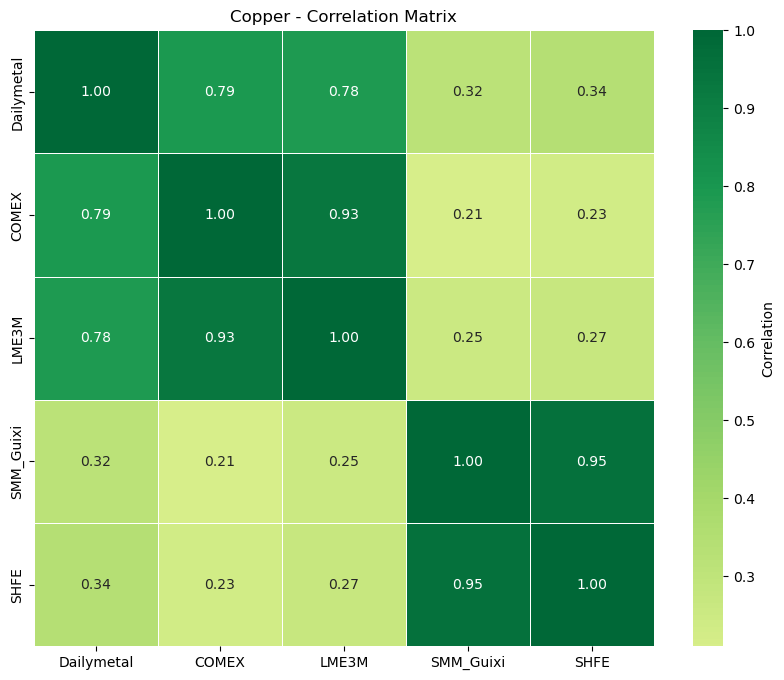

In [58]:
import seaborn as sns

# Calculate the correlation matrix using the returns
dfcu_merged['Dailymetal'] = dfcu_merged['Price_Dailymetal'].pct_change()
dfcu_merged['COMEX'] = dfcu_merged['Price_COMEX'].pct_change()
dfcu_merged['LME3M'] = dfcu_merged['Price_LME_3M'].pct_change()
dfcu_merged['SMM_Guixi'] = dfcu_merged['Price_SMM_Guixi'].pct_change()
dfcu_merged['SHFE'] = dfcu_merged['Price_SHFE'].pct_change()

import matplotlib.pyplot as plt

# Drop NaN values
dfcu_merged = dfcu_merged.dropna(subset=['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE'])

# Calculate the correlation matrix
correlation_matrix_copper = dfcu_merged[['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE']].corr()

# Plot the correlation matrix with a gradient color scale
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper, annot=True,center=0, cmap='RdYlGn', cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper - Correlation Matrix")
plt.show()

In [59]:
# Compute the cointegration
from statsmodels.tsa.stattools import coint
# Define pairs of time series for cointegration tests
pairs_copper = [
    ('Price_Dailymetal', 'Price_COMEX'),
    ('Price_Dailymetal', 'Price_LME_3M'),
    ('Price_Dailymetal', 'Price_SMM_Guixi'),
    ('Price_Dailymetal', 'Price_SHFE'),
    ('Price_COMEX', 'Price_LME_3M'),
    ('Price_COMEX', 'Price_SMM_Guixi'),
    ('Price_COMEX', 'Price_SHFE'),
    ('Price_LME_3M', 'Price_SMM_Guixi'),
    ('Price_LME_3M', 'Price_SHFE'),
    ('Price_SMM_Guixi', 'Price_SHFE')
]
# Perform tests and collect results
results_copper = []
for series1, series2 in pairs_copper:
    score, p_value, _ = coint(dfcu_merged[series1], dfcu_merged[series2])
    results_copper.append((series1, series2, score, p_value))
# Print results as a table with conditional coloring for p-values
print(f"{Fore.YELLOW}Copper Cointegration Test Results:{Style.RESET_ALL}")
print(f"{Fore.CYAN}{'Series 1':<40}{'Series 2':<40}{'Score':<15}{'P-Value':<15}{Style.RESET_ALL}")
for series1, series2, score, p_value in results_copper:
    p_value_color = Fore.GREEN if p_value < 0.05 else Style.RESET_ALL
    print(f"{series1:<40}{series2:<40}{Fore.GREEN}{score:<15.4f}{p_value_color}{p_value:<15.4f}{Style.RESET_ALL}")

Copper Cointegration Test Results:
Series 1                                Series 2                                Score          P-Value        
Price_Dailymetal                        Price_COMEX                             -6.9697        0.0000         
Price_Dailymetal                        Price_LME_3M                            -7.6131        0.0000         
Price_Dailymetal                        Price_SMM_Guixi                         -2.4942        0.2816         
Price_Dailymetal                        Price_SHFE                              -1.8406        0.6098         
Price_COMEX                             Price_LME_3M                            -5.2621        0.0001         
Price_COMEX                             Price_SMM_Guixi                         -1.7680        0.6451         
Price_COMEX                             Price_SHFE                              -1.6684        0.6912         
Price_LME_3M                            Price_SMM_Guixi                      

In [60]:
print("\\begin{table}[ht]")
print("\\centering")
print("{\\small")  # Start smaller font size
print("\\begin{tabular}{llrr}")
print("\\toprule")
print("Series 1 & Series 2 & Score & P-Value \\\\")
print("\\midrule")
for series1, series2, score, p_value in results_copper:
    series1 = series1.replace("_", "\\_")
    series2 = series2.replace("_", "\\_")
    print(f"{series1} & {series2} & {score:.4f} & {p_value:.4f} \\\\")
print("\\bottomrule")
print("\\end{tabular}")
print("}")
print("\\caption{Cointegration Test Results}")
print("\\label{tab:cointegration}")
print("\\end{table}")


\begin{table}[ht]
\centering
{\small
\begin{tabular}{llrr}
\toprule
Series 1 & Series 2 & Score & P-Value \\
\midrule
Price\_Dailymetal & Price\_COMEX & -6.9697 & 0.0000 \\
Price\_Dailymetal & Price\_LME\_3M & -7.6131 & 0.0000 \\
Price\_Dailymetal & Price\_SMM\_Guixi & -2.4942 & 0.2816 \\
Price\_Dailymetal & Price\_SHFE & -1.8406 & 0.6098 \\
Price\_COMEX & Price\_LME\_3M & -5.2621 & 0.0001 \\
Price\_COMEX & Price\_SMM\_Guixi & -1.7680 & 0.6451 \\
Price\_COMEX & Price\_SHFE & -1.6684 & 0.6912 \\
Price\_LME\_3M & Price\_SMM\_Guixi & -1.8859 & 0.5871 \\
Price\_LME\_3M & Price\_SHFE & -1.7824 & 0.6382 \\
Price\_SMM\_Guixi & Price\_SHFE & -5.1848 & 0.0001 \\
\bottomrule
\end{tabular}
}
\caption{Cointegration Test Results}
\label{tab:cointegration}
\end{table}


## Include the ETF

In [61]:
dfcu_merged = pd.merge(dfcu_merged, dfcu6[['Date', 'Price']], on='Date', how='inner')
dfcu_merged = dfcu_merged.rename(columns={'Price': 'Price_ETF'})
dfcu_merged.head()

,Date,Price_Dailymetal,Price_COMEX,Price_LME_3M,Price_SMM_Guixi,Price_SHFE,Dailymetal,COMEX,LME3M,SMM_Guixi,SHFE,Price_ETF
0,2024-03-06,3.8706,3.87,8577.0,68815.0,68940.0,0.006684,0.007812,0.010069,-0.001886,-0.001304,20.15
1,2024-03-07,3.9131,3.92,8640.5,69235.0,69300.0,0.010980,0.012920,0.007404,0.006103,0.005222,20.68
2,2024-03-08,3.8850,3.89,8579.5,69630.0,69710.0,-0.007181,-0.007653,-0.007060,0.005705,0.005916,20.57
3,2024-03-11,3.9240,3.92,8653.0,69335.0,69360.0,0.010039,0.007712,0.008567,-0.004237,-0.005021,20.82
4,2024-03-12,3.9207,3.93,8657.0,69500.0,69520.0,-0.000841,0.002551,0.000462,0.002380,0.002307,20.81


In [62]:
print(f"First observation date: {dfcu_merged['Date'].min()}, Last observation date: {dfcu_merged['Date'].max()}")

First observation date: 2024-03-06 00:00:00, Last observation date: 2024-12-31 00:00:00


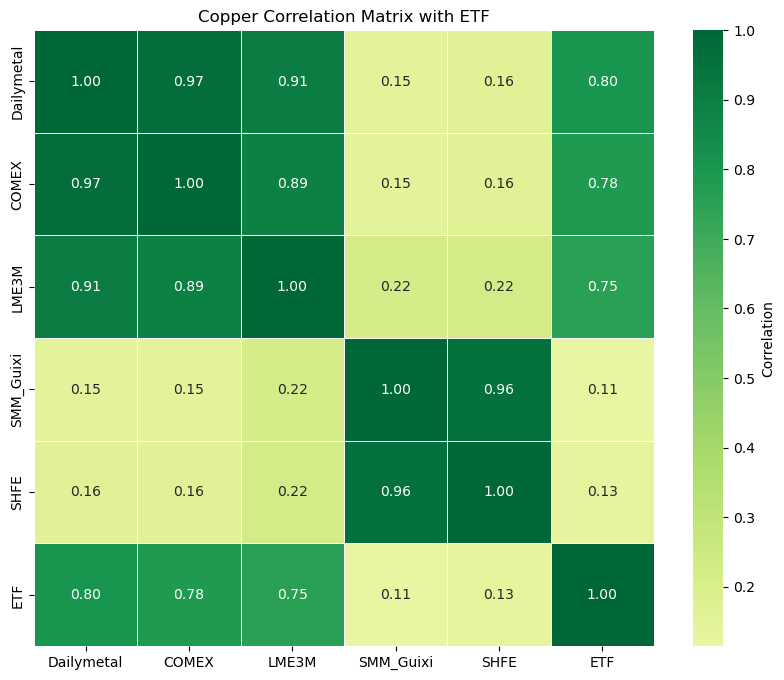

In [63]:
dfcu_merged['ETF'] = dfcu_merged['Price_ETF'].pct_change()
# Drop NaN values
dfcu_merged = dfcu_merged.dropna(subset=['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE', 'ETF'])
# Calculate the correlation matrix including the ETF
correlation_matrix_copper = dfcu_merged[['Dailymetal', 'COMEX', 'LME3M', 'SMM_Guixi', 'SHFE', 'ETF']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_copper, annot=True, cmap='RdYlGn', center=0, cbar_kws={'label': 'Correlation'}, fmt=".2f", linewidths=0.5)
plt.title("Copper Correlation Matrix with ETF")
plt.show()

# Combine

In [64]:
# Per metal, merge the dataframes into a single dataframe using the 'Date' column with an outer join
df_merged_lithium = df1.merge(df2, on='Date', how='outer', suffixes=('_DailyMetal', '_SouthAmericaLOB'))
df_merged_lithium = df_merged_lithium.merge(df3.rename(columns={'Price': 'Price_COMEXLithiumHydroxide'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df4.rename(columns={'Price': 'Price_LithiumAmericasCorp'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df5.rename(columns={'Price': 'Price_EastAsiaLithiumCarbonate'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df6.rename(columns={'Price': 'Price_EastAsiaLithiumCarbonateBatteryGrade'}), on='Date', how='outer')
df_merged_lithium = df_merged_lithium.merge(df7.rename(columns={'Price': 'Price_LithiumLME'}), on='Date', how='outer')
# Convert all price columns to float
df_merged_lithium['Price_DailyMetal'] = df_merged_lithium['Price_DailyMetal'].astype(float)
df_merged_lithium['Price_SouthAmericaLOB'] = df_merged_lithium['Price_SouthAmericaLOB'].astype(float)
df_merged_lithium['Price_COMEXLithiumHydroxide'] = df_merged_lithium['Price_COMEXLithiumHydroxide'].astype(float)
df_merged_lithium['Price_LithiumAmericasCorp'] = df_merged_lithium['Price_LithiumAmericasCorp'].astype(float)
df_merged_lithium['Price_EastAsiaLithiumCarbonate'] = df_merged_lithium['Price_EastAsiaLithiumCarbonate'].astype(float)
df_merged_lithium['Price_EastAsiaLithiumCarbonateBatteryGrade'] = df_merged_lithium['Price_EastAsiaLithiumCarbonateBatteryGrade'].astype(float)
df_merged_lithium['Price_LithiumLME'] = df_merged_lithium['Price_LithiumLME'].astype(float)
# Export the merged dataframe to a CSV file
df_merged_lithium.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_outer.csv', index=False)

# Nickel dataframes
df_merged_nickel = dfn1.merge(dfn2, on='Date', how='outer', suffixes=('_Nickel', '_LME'))
df_merged_nickel = df_merged_nickel.merge(dfn3.rename(columns={'Price': 'Price_ETF'}), on='Date', how='outer')
df_merged_nickel = df_merged_nickel.merge(dfn4.rename(columns={'Price': 'Price_SHFE'}), on='Date', how='outer')
df_merged_nickel = df_merged_nickel.merge(dfn5.rename(columns={'Price': 'Price_WUXI'}), on='Date', how='outer')
df_merged_nickel = df_merged_nickel.merge(dfn6.rename(columns={'Price': 'Price_India'}), on='Date', how='outer')

# Convert all price columns to float
df_merged_nickel['Price_Nickel'] = df_merged_nickel['Price_Nickel'].astype(float)
df_merged_nickel['Price_LME'] = df_merged_nickel['Price_LME'].astype(float)
df_merged_nickel['Price_ETF'] = df_merged_nickel['Price_ETF'].astype(float)
df_merged_nickel['Price_SHFE'] = df_merged_nickel['Price_SHFE'].astype(float)
df_merged_nickel['Price_WUXI'] = df_merged_nickel['Price_WUXI'].astype(float)
df_merged_nickel['Price_India'] = df_merged_nickel['Price_India'].astype(float)
# Export the merged dataframe to a CSV file
df_merged_nickel.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_outer.csv', index=False)
# Cobalt dataframes
df_merged_cobalt = dfc1.merge(dfc2, on='Date', how='outer', suffixes=('_Cobalt', '_LME'))
df_merged_cobalt = df_merged_cobalt.merge(dfc5.rename(columns={'Price': 'Price_LME_All_Location_Stock'}), on='Date', how='outer')
df_merged_cobalt = df_merged_cobalt.merge(dfc6.rename(columns={'Price': 'Price_WUXI'}), on='Date', how='outer')
df_merged_cobalt = df_merged_cobalt.merge(dfc7.rename(columns={'Price': 'Price_COMEX'}), on='Date', how='outer')

# Convert all price columns to float
df_merged_cobalt['Price_Cobalt'] = df_merged_cobalt['Price_Cobalt'].astype(float)
df_merged_cobalt['Price_LME'] = df_merged_cobalt['Price_LME'].astype(float)
df_merged_cobalt['Price_LME_All_Location_Stock'] = df_merged_cobalt['Price_LME_All_Location_Stock'].astype(float)
df_merged_cobalt['Price_WUXI'] = df_merged_cobalt['Price_WUXI'].astype(float)
df_merged_cobalt['Price_COMEX'] = df_merged_cobalt['Price_COMEX'].astype(float)

# Export the merged dataframe to a CSV file
df_merged_cobalt.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_outer.csv', index=False)
# Copper dataframes
df_merged_copper = dfcu1.merge(dfcu2, on='Date', how='outer', suffixes=('_Dailymetal', '_COMEX'))
df_merged_copper = df_merged_copper.merge(dfcu3.rename(columns={'Price': 'Price_LME_3M'}), on='Date', how='outer')
df_merged_copper = df_merged_copper.merge(dfcu4.rename(columns={'Price': 'Price_SMM_Guixi'}), on='Date', how='outer')
df_merged_copper = df_merged_copper.merge(dfcu5.rename(columns={'Price': 'Price_SHFE'}), on='Date', how='outer')
df_merged_copper = df_merged_copper.merge(dfcu6.rename(columns={'Price': 'Price_ETF'}), on='Date', how='outer')
# Convert all price columns to float
df_merged_copper['Price_Dailymetal'] = df_merged_copper['Price_Dailymetal'].astype(float)
df_merged_copper['Price_COMEX'] = df_merged_copper['Price_COMEX'].astype(float)
df_merged_copper['Price_LME_3M'] = df_merged_copper['Price_LME_3M'].astype(float)
df_merged_copper['Price_SMM_Guixi'] = df_merged_copper['Price_SMM_Guixi'].astype(float)
df_merged_copper['Price_SHFE'] = df_merged_copper['Price_SHFE'].astype(float)
df_merged_copper['Price_ETF'] = df_merged_copper['Price_ETF'].astype(float)
# Export the merged dataframe to a CSV file
df_merged_copper.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_outer.csv', index=False)

In [65]:
# Now for all metals, interpolate the missing values in the merged dataframe. Use linear interpolation for the 'Price' columns.
df_merged_lithium = df_merged_lithium.interpolate(method='linear', limit_direction='both', limit_area='inside')
df_merged_nickel = df_merged_nickel.interpolate(method='linear', limit_direction='both', limit_area='inside')
df_merged_cobalt = df_merged_cobalt.interpolate(method='linear', limit_direction='both', limit_area='inside')
df_merged_copper = df_merged_copper.interpolate(method='linear', limit_direction='both', limit_area='inside')
# Save the interpolated dataframes to CSV files
df_merged_lithium.to_csv('/Users/michal/Documents/Code/metals/data/ALL_lithium_prices_interpolated.csv', index=False)
df_merged_nickel.to_csv('/Users/michal/Documents/Code/metals/data/ALL_nickel_prices_interpolated.csv', index=False)
df_merged_cobalt.to_csv('/Users/michal/Documents/Code/metals/data/ALL_cobalt_prices_interpolated.csv', index=False)
df_merged_copper.to_csv('/Users/michal/Documents/Code/metals/data/ALL_copper_prices_interpolated.csv', index=False)

/var/folders/mx/rb01m4j51yzbjz0dxm6z_2r80000gn/T/ipykernel_3899/1937149183.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_merged_nickel = df_merged_nickel.interpolate(method='linear', limit_direction='both', limit_area='inside')


# Compare different metals on the same exchange

## LME